# **Módulo 2: Machine Learning**
# **Examen de Certificación: Intento 2**
# **Predicción de Diabetes: Análisis y Modelado con Machine Learning**

## **Instrucciones para examen**

### **Objetivo:**
Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

### **Contexto y Descripción del Dataset**

El **«Diabetes Dataset»** contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

**Diccionario de Datos:**

- **Pregnancies:** Número de embarazos.

- **Glucose:** Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.

- **BloodPressure:** Presión arterial diastólica (mmHg).

- **SkinThickness:** Espesor del pliegue cutáneo del tríceps (mm).

- **Insulin:** Niveles séricos de insulina a las 2 horas (µU/ml).

- **BMI:** Índice de masa corporal (peso en kg) / (altura en m²).

- **DiabetesPedigreeFunction:** Función de pedigrí de diabetes.

- **Age:** Edad (años).

- **Outcome:** Variable objetivo (1: diabetes, 0: no diabetes).

---

## **Requisitos**

### **1. Limpieza de Datos:**

- ***Identificación y eliminación de valores duplicados:*** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

- ***Verificación y ajuste de tipos de datos:*** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

- ***Corrección de inconsistencias en valores categóricos:*** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

- ***Manejo de valores faltantes adecuadamente:*** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

### **2. Exploración de Datos:**

- ***Visualizaciones univariadas y multivariadas:*** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

- ***Estadísticas descriptivas:*** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

### **3. Implementación de Modelos:**

- ***Modelos de Clasificación:*** Implementa modelos de Random Forest y XGBoost.

- ***Evaluación de Modelos:*** Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.

- ***Comparación de Rendimiento:*** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

---

## **Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

- Proceso completo de limpieza y preprocesamiento de datos.

- Visualizaciones y estadísticas descriptivas.

- Implementación y evaluación de los modelos de clasificación.

- Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

---

### **Consideraciones Éticas y Tecnológicas**

**Consideraciones Éticas:**

- *Transparencia y Reproducibilidad:* Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.

- *Imparcialidad y Sesgo:* Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

**Consideraciones Tecnológicas:**

- *Herramientas Utilizadas:* Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.

- *Escalabilidad:* Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.

- *Optimización de Modelos:* Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.



### **1. Limpieza de datos**

In [1]:
import pandas as pd

# Cargar el dataset
file_path = r'C:\Users\Andy\Documents\Examen\Data\diabetes.csv'
diabetes_data = pd.read_csv(file_path)

# Caracterización del dataset
print("--- Información del Dataset ---")
print(f"Forma del dataset: {diabetes_data.shape}")
print("\n--- Primeras 5 filas ---")
print(diabetes_data.head())
print("\n--- Tipos de Datos ---")
print(diabetes_data.dtypes)

# Identificar valores faltantes
print("\n--- Valores faltantes por columna ---")
print(diabetes_data.isnull().sum())

# Identificar filas duplicadas
duplicate_rows = diabetes_data.duplicated().sum()
print(f"\n--- Filas duplicadas ---\n{duplicate_rows} filas duplicadas encontradas.")

# Identificar valores cero en columnas relevantes
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_values = (diabetes_data[columns_to_check] == 0).sum()
print("\n--- Valores cero en columnas relevantes ---")
print(zero_values)


--- Información del Dataset ---
Forma del dataset: (768, 9)

--- Primeras 5 filas ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- Tipos de Datos ---
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI          

In [2]:
# Verificar los tipos de datos
print("--- Tipos de datos originales ---")
print(diabetes_data.dtypes)

# Ajustar tipos de datos si es necesario
# Cambiar la columna 'Outcome' a tipo booleano
diabetes_data['Outcome'] = diabetes_data['Outcome'].astype(bool)

# Verificar los nuevos tipos de datos
print("\n--- Tipos de datos después de los ajustes ---")
print(diabetes_data.dtypes)

# No hay columnas categóricas explícitas en el dataset además de 'Outcome', que ya es binaria.

--- Tipos de datos originales ---
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

--- Tipos de datos después de los ajustes ---
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                        bool
dtype: object


--- Conteo de valores cero en columnas relevantes ---
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64
--- Estadísticas Descriptivas de las Columnas ---
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.254807      26.606479   94.652344   32.450805
std     30.438286      12.115932       9.631241  105.547598    6.875374
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      20.536458   30.500000   27.500000
50%    117.000000      72.000000      23.000000   31.250000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


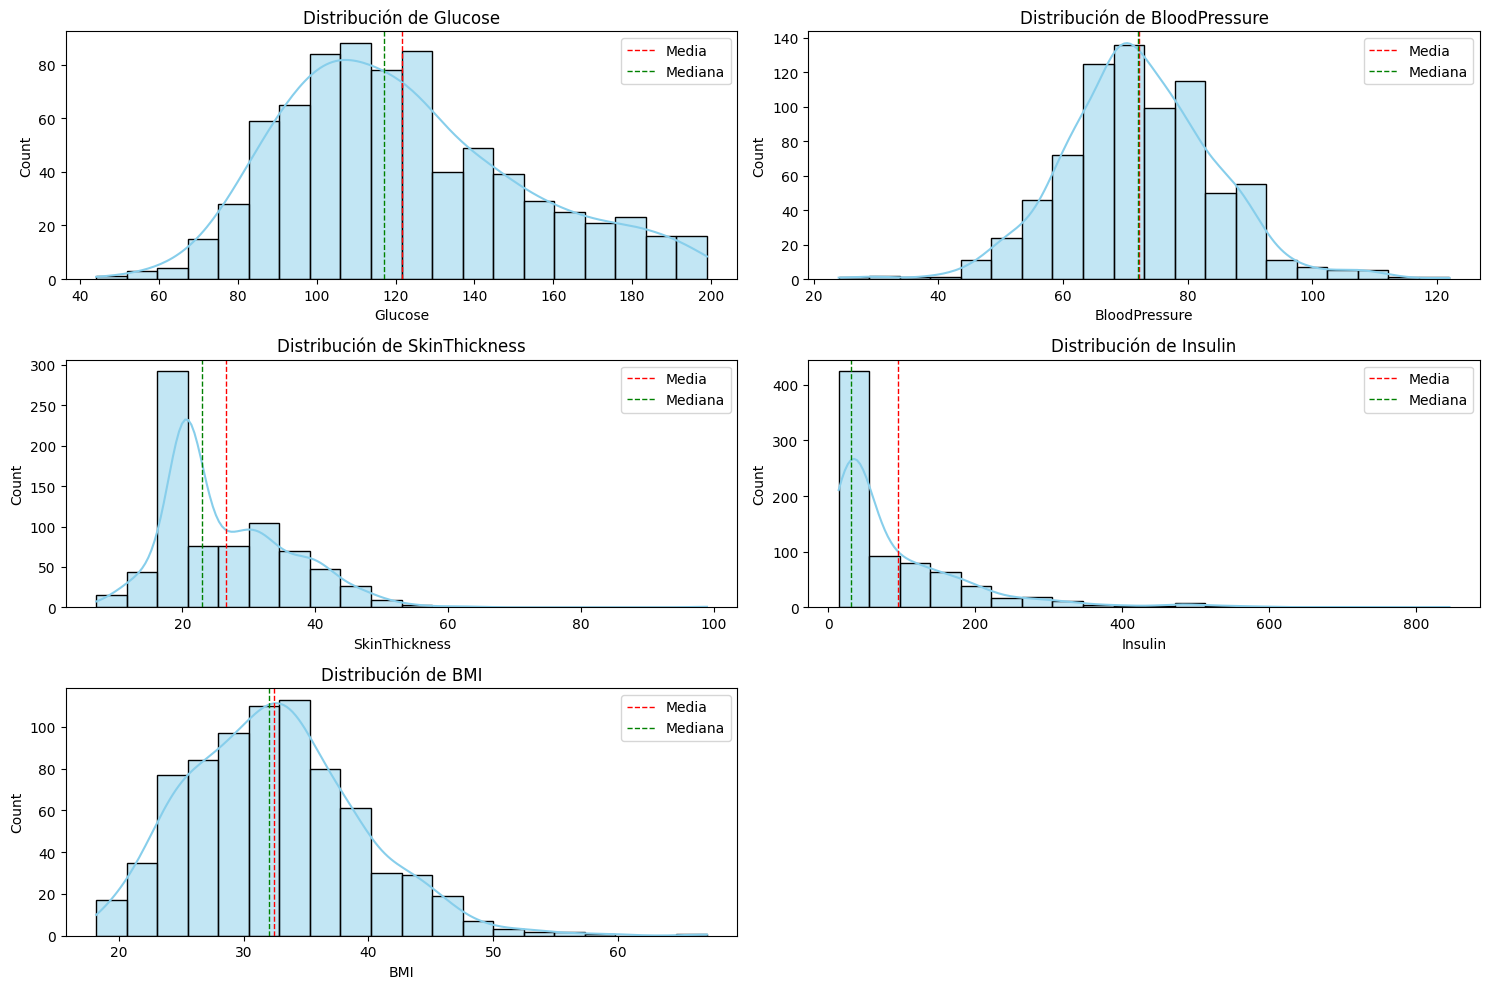

Imputando valores cero en Glucose con la mediana: 117.0
Imputando valores cero en BloodPressure con la mediana: 72.0
Imputando valores cero en SkinThickness con la mediana: 23.0
Imputando valores cero en Insulin con la mediana: 31.25
Imputando valores cero en BMI con la mediana: 32.0

--- Valores cero después de la imputación ---
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas donde los valores cero no corresponden
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Conteo de valores cero
zero_counts = (diabetes_data[columns_to_impute] == 0).sum()
print("--- Conteo de valores cero en columnas relevantes ---")
print(zero_counts)

# Calcular estadísticas descriptivas para decidir el método de imputación
stats = diabetes_data[columns_to_impute].describe()
print("--- Estadísticas Descriptivas de las Columnas ---")
print(stats)

# Graficar la distribución de las columnas relevantes
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Crear subplots para cada columna
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_impute, 1):
    plt.subplot(3, 2, i)  # Crear una cuadrícula de subplots
    sns.histplot(diabetes_data[column], kde=True, bins=20, color='skyblue')
    plt.axvline(diabetes_data[column].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
    plt.axvline(diabetes_data[column].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
    plt.title(f'Distribución de {column}')
    plt.legend()

plt.tight_layout()
plt.show()

# Imputación basada en las características de cada columna
for column in columns_to_impute:
    if diabetes_data[column].median() < diabetes_data[column].mean():
        # Usar la mediana si hay asimetría positiva
        replacement_value = diabetes_data[column].median()
        print(f"Imputando valores cero en {column} con la mediana: {replacement_value}")
    else:
        # Usar la media si la distribución es aproximadamente simétrica
        replacement_value = diabetes_data[column].mean()
        print(f"Imputando valores cero en {column} con la media: {replacement_value}")
    
    # Reemplazar valores cero
    diabetes_data[column] = diabetes_data[column].replace(0, replacement_value)

# Verificar si los valores cero fueron reemplazados
zero_values_after = (diabetes_data[columns_to_impute] == 0).sum()

print("\n--- Valores cero después de la imputación ---")
print(zero_values_after)

### **2. Exploración de Datos**

--- Estadísticas Descriptivas ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
m

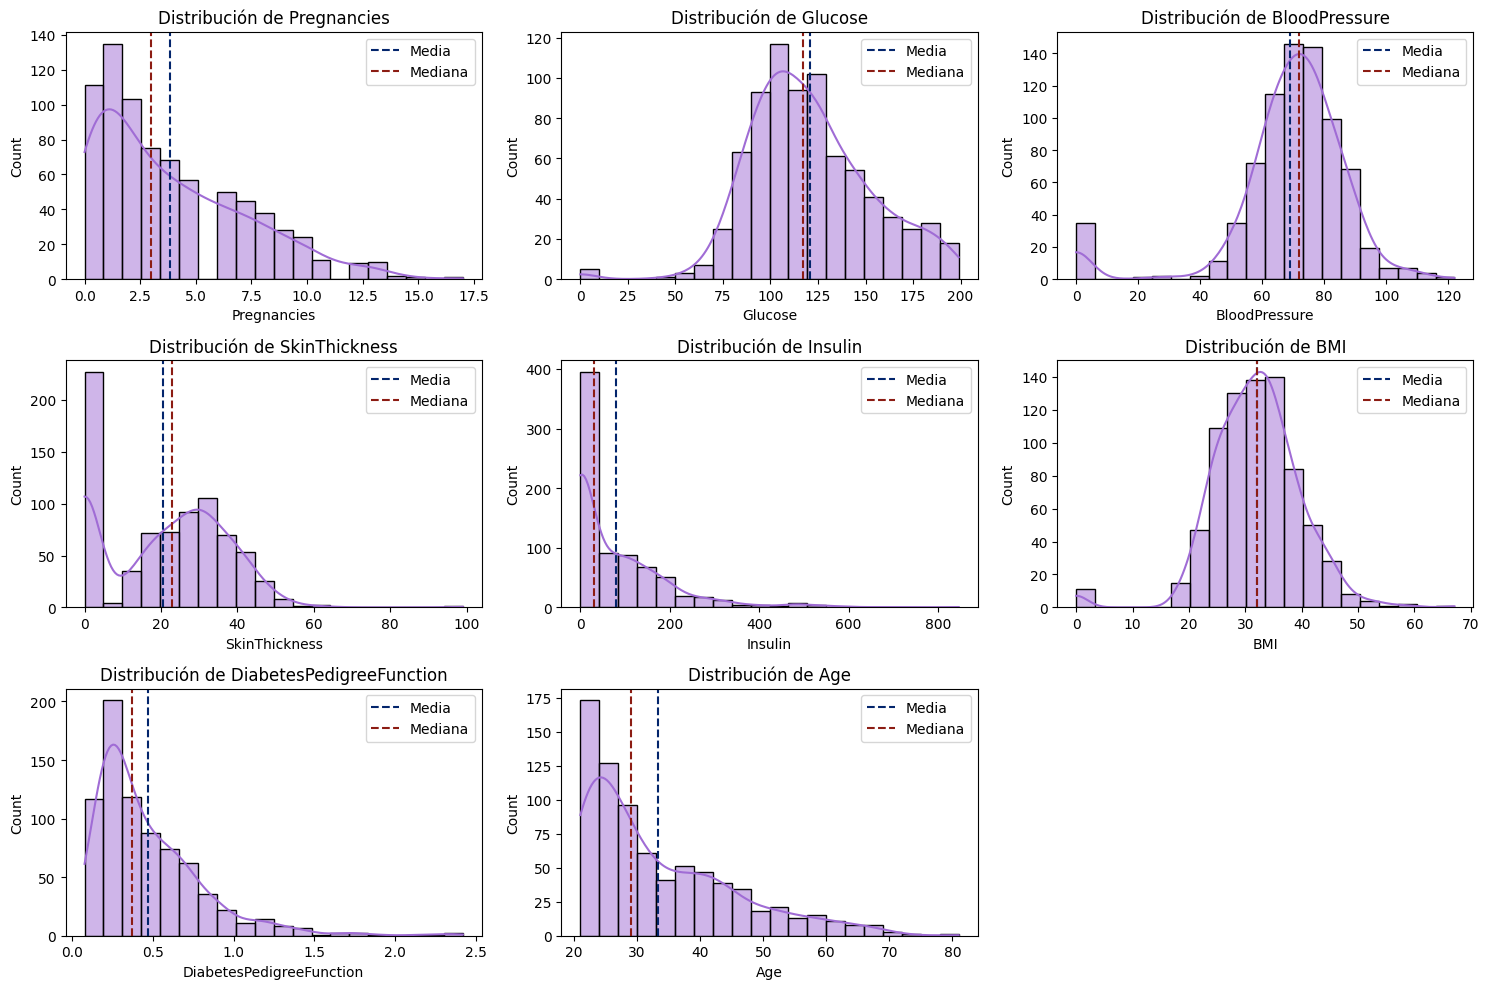

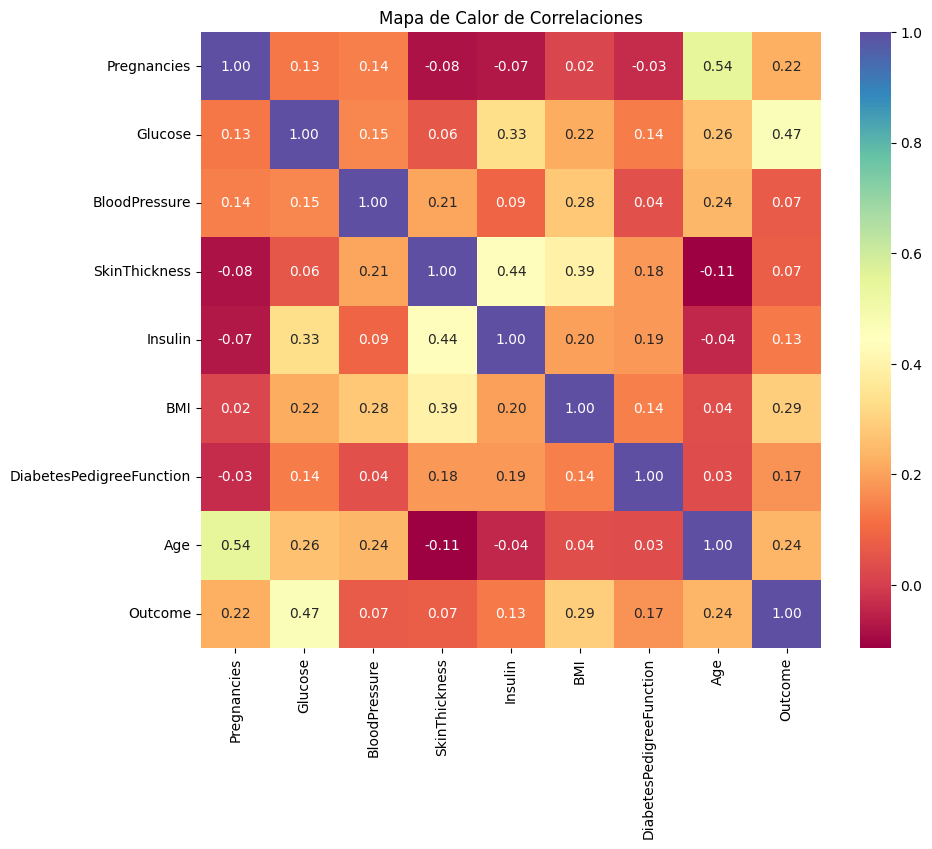

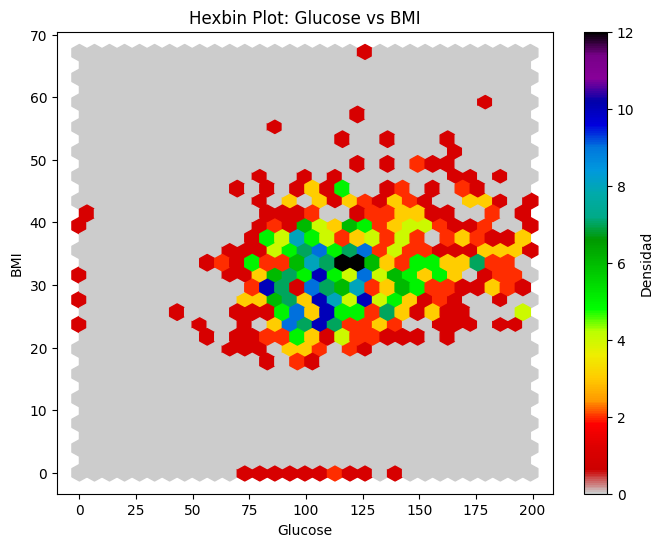

<Figure size 640x480 with 0 Axes>


--- Valores Mínimos y Máximos por Columna ---
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
min          0.0      0.0            0.0            0.0      0.0   0.0   
max         17.0    199.0          122.0           99.0    846.0  67.1   

     DiabetesPedigreeFunction   Age  Outcome  
min                     0.078  21.0      0.0  
max                     2.420  81.0      1.0  


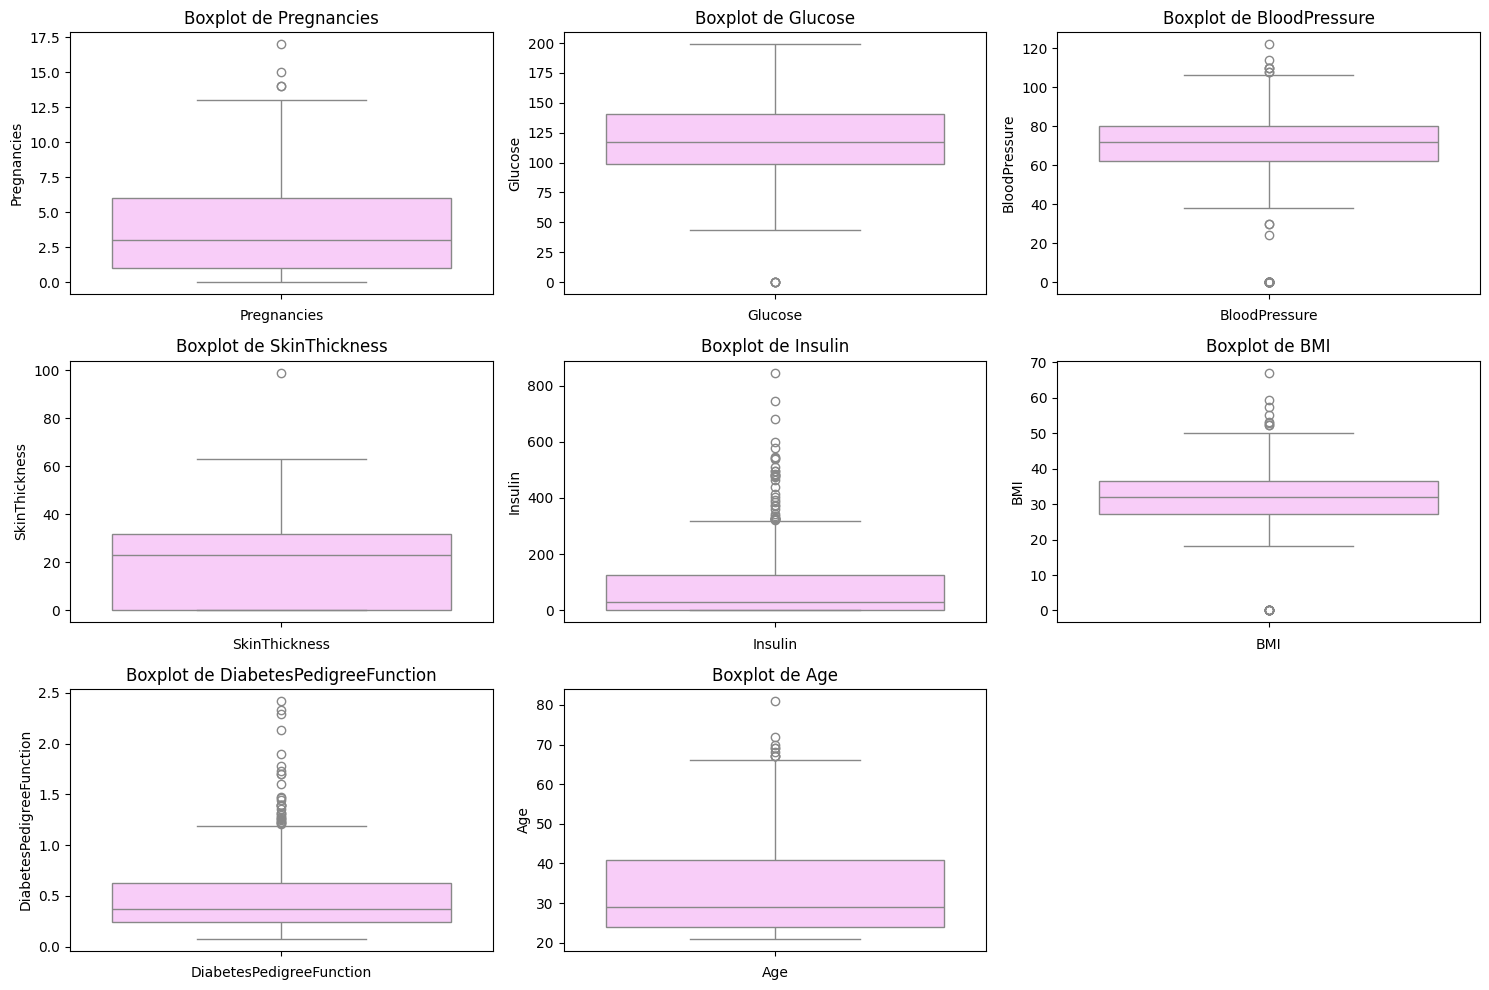


--- Interpretación y Tratamiento de Outliers ---

1. Glucose:
   - Valores bajos (cercanos a 0): Representan datos faltantes y se imputarán con la mediana.
   - Valores altos: Se mantienen porque son representativos de casos de hiperglucemia severa, lo cual es relevante para identificar y analizar patrones relacionados con la diabetes.

2. BloodPressure:
   - Valores bajos (cercanos a 0): Improbables y reflejan datos faltantes; se imputarán con la mediana.
   - Valores altos: Se mantienen porque representan casos clínicos reales de hipertensión, una condición común en pacientes con diabetes.

3. SkinThickness:
   - Valores bajos (cercanos a 0): Indicativos de datos faltantes; se imputarán con la mediana.
   - Valores altos: Se mantienen porque pueden reflejar condiciones específicas como obesidad extrema o errores sistemáticos en la medición, pero requieren revisión caso a caso.

4. Insulin:
   - Valores bajos (cercanos a 0): Representan datos faltantes y se imputarán con la mediana.


In [57]:
# Estadísticas descriptivas
print("--- Estadísticas Descriptivas ---")
print(diabetes_data.describe())

# Visualizaciones univariadas: Distribución de las variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(diabetes_data.columns[:-1], 1):  # Excluye 'Outcome'
    plt.subplot(3, 3, i)
    sns.histplot(diabetes_data[column], kde=True, bins=20, color='#a06cd5')
    plt.axvline(diabetes_data[column].mean(), color='#03256c', linestyle='dashed', label='Media')
    plt.axvline(diabetes_data[column].median(), color='#8c1c13', linestyle='dashed', label='Mediana')
    plt.title(f'Distribución de {column}')
    plt.legend()

plt.tight_layout()
plt.show()

# Visualizaciones multivariadas: Correlación y dispersión
# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='Spectral', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Diagramas de dispersión entre variables clave y 'Outcome'
plt.figure(figsize=(8, 6))
plt.hexbin(diabetes_data['Glucose'], diabetes_data['BMI'], gridsize=30, cmap='nipy_spectral_r')
plt.colorbar(label='Densidad')
plt.title('Hexbin Plot: Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

plt.tight_layout()
plt.show()

# Verificación de outliers usando mínimos, máximos y boxplots
print("\n--- Valores Mínimos y Máximos por Columna ---")
min_max_values = diabetes_data.describe().loc[['min', 'max']]
print(min_max_values)

# Boxplots para identificar visualmente outlierso
plt.figure(figsize=(15, 10))
for i, column in enumerate(diabetes_data.columns[:-1], 1):  # Excluye 'Outcome'
    plt.subplot(3, 3, i)
    sns.boxplot(data=diabetes_data[column], color='#ffc6ff')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


# Interpretación y Tratamiento de Outliers
print("\n--- Interpretación y Tratamiento de Outliers ---")
print("""
1. Glucose:
   - Valores bajos (cercanos a 0): Representan datos faltantes y se imputarán con la mediana.
   - Valores altos: Se mantienen porque son representativos de casos de hiperglucemia severa, lo cual es relevante para identificar y analizar patrones relacionados con la diabetes.

2. BloodPressure:
   - Valores bajos (cercanos a 0): Improbables y reflejan datos faltantes; se imputarán con la mediana.
   - Valores altos: Se mantienen porque representan casos clínicos reales de hipertensión, una condición común en pacientes con diabetes.

3. SkinThickness:
   - Valores bajos (cercanos a 0): Indicativos de datos faltantes; se imputarán con la mediana.
   - Valores altos: Se mantienen porque pueden reflejar condiciones específicas como obesidad extrema o errores sistemáticos en la medición, pero requieren revisión caso a caso.

4. Insulin:
   - Valores bajos (cercanos a 0): Representan datos faltantes y se imputarán con la mediana.
   - Valores altos: Se mantienen porque son biológicamente plausibles en casos de hiperinsulinemia, relevantes para entender respuestas metabólicas extremas.

5. BMI:
   - Valores bajos (cercanos a 0): Reflejan datos faltantes y se imputarán con la mediana.
   - Valores altos: Se mantienen porque representan casos de obesidad severa, que son importantes para el análisis de riesgo en diabetes.

6. Age:
   - Valores bajos y altos: No se consideran outliers, ya que reflejan la distribución esperada de la población. No requieren imputación ni eliminación.
""")



### **3. Implementación de Modelos**


Random Forest Performance:
Accuracy: 0.75
Precision: 0.68
Recall: 0.53
F1-Score: 0.60
ROC-AUC: 0.82

XGBoost Performance:
Accuracy: 0.72
Precision: 0.62
Recall: 0.53
F1-Score: 0.57
ROC-AUC: 0.80


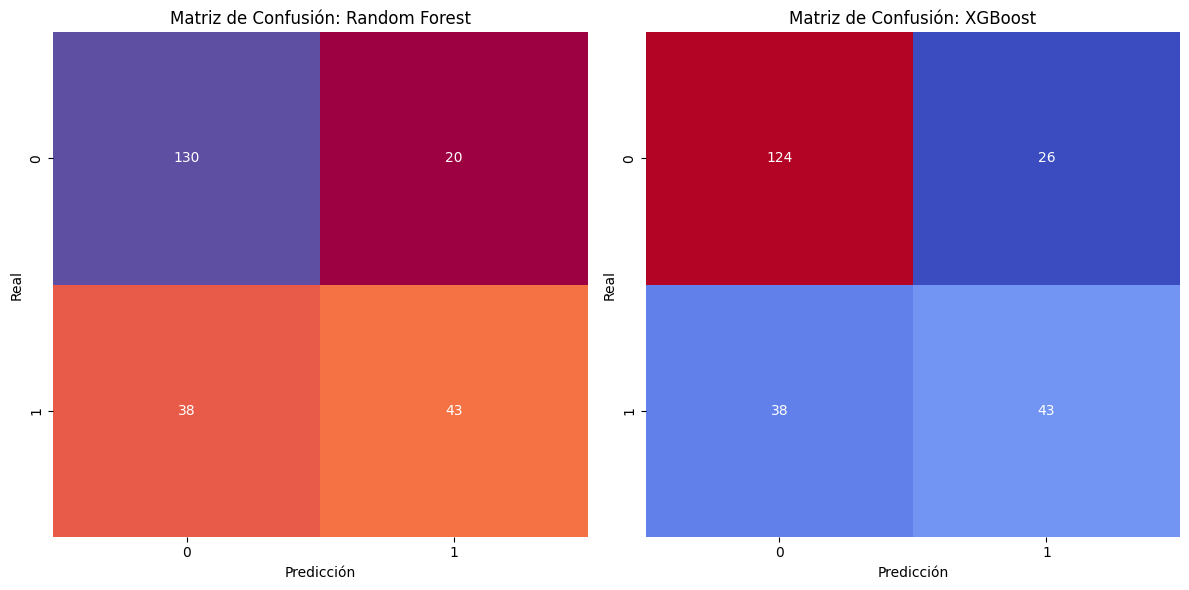


--- Comparación de Modelos ---
Random Forest: Accuracy=0.75, ROC-AUC=0.82
XGBoost: Accuracy=0.72, ROC-AUC=0.80

--- Comentario sobre la Comparación de Rendimientos ---

Random Forest y XGBoost muestran diferencias en su rendimiento:

1. Random Forest tiene un mejor desempeño en términos de ROC-AUC y precisión, 
   lo que indica que es más confiable para identificar correctamente los casos positivos de diabetes.
2. XGBoost es conocido por su eficiencia en memoria y escalabilidad, siendo una excelente opción para grandes conjuntos de datos.

Modelo más adecuado:
- Random Forest es ideal para este dataset específico, dado su mejor balance entre métricas.
- XGBoost sería preferido si se prioriza la escalabilidad para conjuntos de datos más grandes o más complejos.



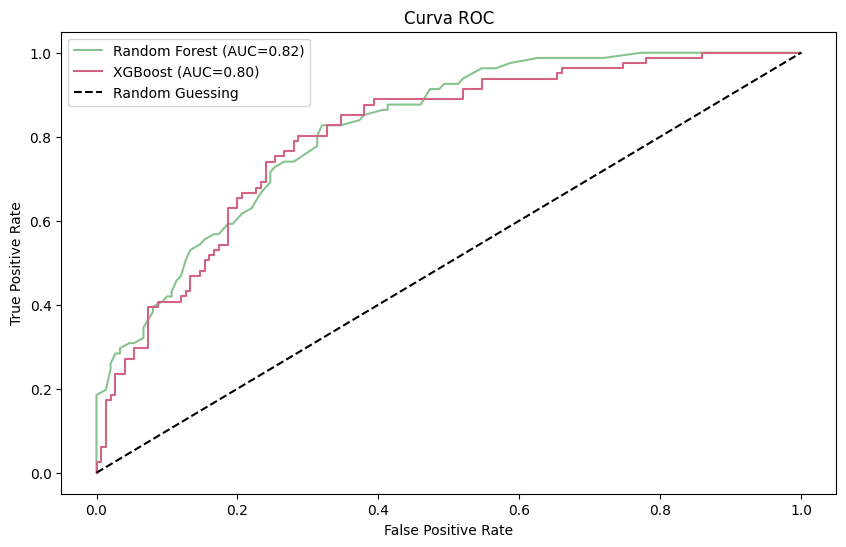


--- Consideraciones para Escalabilidad ---

1. Ambos modelos (Random Forest y XGBoost) son escalables a datasets más grandes. 
   - Random Forest puede ser paralelizado con facilidad.
   - XGBoost es altamente eficiente en memoria y computación, siendo una excelente opción para grandes conjuntos de datos.
2. Técnicas como reducción de dimensionalidad (PCA) o muestreo podrían ser útiles para mejorar el rendimiento en datasets extremadamente grandes.


--- Optimización de Modelos ---

1. No se aplicó optimización de hiperparámetros en este ejercicio.
2. En implementaciones futuras, se recomienda optimizar con herramientas como GridSearchCV o RandomizedSearchCV para ajustar parámetros clave como:
   - Número de estimadores (n_estimators)
   - Profundidad máxima de los árboles (max_depth)
   - Tasa de aprendizaje (learning_rate) para XGBoost.



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)
# Preparación de los Datos
X = diabetes_data.drop('Outcome', axis=1)  # Variables independientes
y = diabetes_data['Outcome']              # Variable dependiente

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Implementación de Modelos
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_probabilities = xgb_model.predict_proba(X_test)[:, 1]

# Evaluación de Modelos
def evaluate_model(name, y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    return accuracy, precision, recall, f1, roc_auc

rf_metrics = evaluate_model("Random Forest", y_test, rf_predictions, rf_probabilities)
xgb_metrics = evaluate_model("XGBoost", y_test, xgb_predictions, xgb_probabilities)

# Matrices de Confusión 
rf_cm = confusion_matrix(y_test, rf_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)

# Visualización de Matrices de Confusión en Subplots
plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Matriz de Confusión: Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')

# XGBoost
plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Matriz de Confusión: XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

# --- Comparación de Rendimientos ---
print("\n--- Comparación de Modelos ---")
print(f"Random Forest: Accuracy={rf_metrics[0]:.2f}, ROC-AUC={rf_metrics[4]:.2f}")
print(f"XGBoost: Accuracy={xgb_metrics[0]:.2f}, ROC-AUC={xgb_metrics[4]:.2f}")

# --- Comentario y Recomendación ---
print("\n--- Comentario sobre la Comparación de Rendimientos ---")
print("""
Random Forest y XGBoost muestran diferencias en su rendimiento:

1. Random Forest tiene un mejor desempeño en términos de ROC-AUC y precisión, 
   lo que indica que es más confiable para identificar correctamente los casos positivos de diabetes.
2. XGBoost es conocido por su eficiencia en memoria y escalabilidad, siendo una excelente opción para grandes conjuntos de datos.

Modelo más adecuado:
- Random Forest es ideal para este dataset específico, dado su mejor balance entre métricas.
- XGBoost sería preferido si se prioriza la escalabilidad para conjuntos de datos más grandes o más complejos.
""")

# --- Curvas ROC ---
plt.figure(figsize=(10, 6))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities)
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC={rf_metrics[4]:.2f})", color='#87c38f')
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC={xgb_metrics[4]:.2f})", color='#d36582')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# --- Consideraciones para Escalabilidad ---
print("\n--- Consideraciones para Escalabilidad ---")
print("""
1. Ambos modelos (Random Forest y XGBoost) son escalables a datasets más grandes. 
   - Random Forest puede ser paralelizado con facilidad.
   - XGBoost es altamente eficiente en memoria y computación, siendo una excelente opción para grandes conjuntos de datos.
2. Técnicas como reducción de dimensionalidad (PCA) o muestreo podrían ser útiles para mejorar el rendimiento en datasets extremadamente grandes.
""")

# --- Optimización de Modelos ---
print("\n--- Optimización de Modelos ---")
print("""
1. No se aplicó optimización de hiperparámetros en este ejercicio.
2. En implementaciones futuras, se recomienda optimizar con herramientas como GridSearchCV o RandomizedSearchCV para ajustar parámetros clave como:
   - Número de estimadores (n_estimators)
   - Profundidad máxima de los árboles (max_depth)
   - Tasa de aprendizaje (learning_rate) para XGBoost.
""")
